In [1]:
import os, sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/nexus-admin/NEXUS_RF/BackendTools')
import TimestreamHelperFunctions as Thf
import PulseTriggeringTools as Ptt

import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf

%matplotlib notebook

In [2]:
## Define the runs of interest
run_dict = {"series": [
    "20221019_124248",
    "20221019_124913",
    "20221019_130611",
    "20221019_130226",
    "20221019_125829",
    "20221019_125424",] , 
            "Vled"  : [
    6.0,
    3.0,
    2.7,
    2.5,
    2.3,
    2.2,] }
n_runs = len(run_dict["series"])
run_df = pd.DataFrame(run_dict)
print("Total runs:",n_runs)

Total runs: 6


In [3]:
noise_files = np.zeros(n_runs, dtype='object')
vna_files   = np.zeros(n_runs, dtype='object')
powers      = np.zeros(n_runs)
i = 0

for series in run_df['series'].to_numpy():
    data_path = os.path.join('/data/USRP_Noise_Scans',series.split('_')[0],series)
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series, verbose=False)
    metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
    powers[i]      = metadata['power']
    noise_files[i] = tone_files[0]
    vna_files[i]   = vna_file
    i += 1
    
run_df["noise path"] = noise_files
run_df["vna path"]   = vna_files
run_df["power"]      = powers

## Fill these columns in later
run_df["pls_sec_s"] = [None]*n_runs
run_df["N_pls_fnd"] = [None]*n_runs # np.zeros(n_runs, dtype=type(None))
run_df["p_rate_Hz"] = [None]*n_runs # np.zeros(n_runs, dtype=type(None))
run_df["pls_sec_f"] = [None]*n_runs # np.zeros(n_runs, dtype=type(None))
run_df

,series,Vled,noise path,vna path,power,pls_sec_s,N_pls_fnd,p_rate_Hz,pls_sec_f
0,20221019_124248,6.0,/data/USRP_Noise_Scans/20221019/20221019_12424...,/data/USRP_Noise_Scans/20221019/20221019_12424...,-30.0,None,None,None,None
1,20221019_124913,3.0,/data/USRP_Noise_Scans/20221019/20221019_12491...,/data/USRP_Noise_Scans/20221019/20221019_12491...,-30.0,None,None,None,None
2,20221019_130611,2.7,/data/USRP_Noise_Scans/20221019/20221019_13061...,/data/USRP_Noise_Scans/20221019/20221019_13061...,-30.0,None,None,None,None
3,20221019_130226,2.5,/data/USRP_Noise_Scans/20221019/20221019_13022...,/data/USRP_Noise_Scans/20221019/20221019_13022...,-30.0,None,None,None,None
4,20221019_125829,2.3,/data/USRP_Noise_Scans/20221019/20221019_12582...,/data/USRP_Noise_Scans/20221019/20221019_12582...,-30.0,None,None,None,None
5,20221019_125424,2.2,/data/USRP_Noise_Scans/20221019/20221019_12542...,/data/USRP_Noise_Scans/20221019/20221019_12542...,-30.0,None,None,None,None


In [24]:
## Store some known values
_ = 0
run_df["pls_sec_s"].iloc[_] = 1.1097
run_df["N_pls_fnd"].iloc[_] = 1065
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 11.750

_ = 1
run_df["pls_sec_s"].iloc[_] = 1.878
run_df["N_pls_fnd"].iloc[_] = 987
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 11.80

_ = 2
run_df["pls_sec_s"].iloc[_] = 2.049
run_df["N_pls_fnd"].iloc[_] = 947
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 10.0

run_df

/usr/local/share/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,series,Vled,noise path,vna path,power,pls_sec_s,N_pls_fnd,p_rate_Hz,pls_sec_f
0,20221019_124248,6.0,/data/USRP_Noise_Scans/20221019/20221019_12424...,/data/USRP_Noise_Scans/20221019/20221019_12424...,-30.0,1.1097,1065,100,11.75
1,20221019_124913,3.0,/data/USRP_Noise_Scans/20221019/20221019_12491...,/data/USRP_Noise_Scans/20221019/20221019_12491...,-30.0,1.878,987,100,11.8
2,20221019_130611,2.7,/data/USRP_Noise_Scans/20221019/20221019_13061...,/data/USRP_Noise_Scans/20221019/20221019_13061...,-30.0,2.049,947,100,10
3,20221019_130226,2.5,/data/USRP_Noise_Scans/20221019/20221019_13022...,/data/USRP_Noise_Scans/20221019/20221019_13022...,-30.0,None,None,None,None
4,20221019_125829,2.3,/data/USRP_Noise_Scans/20221019/20221019_12582...,/data/USRP_Noise_Scans/20221019/20221019_12582...,-30.0,None,None,None,None
5,20221019_125424,2.2,/data/USRP_Noise_Scans/20221019/20221019_12542...,/data/USRP_Noise_Scans/20221019/20221019_12542...,-30.0,None,None,None,None


In [44]:
idx = 1
series = run_df["series"].iloc[idx]
Vled   = run_df["Vled"].iloc[idx]
print(series, ":", Vled, "V")

20221019_124913 : 3.0 V


Line Delay file:  /data/USRP_Noise_Scans/20221019/20221019_124913/USRP_Delay_20221019_124913.h5
VNA scan file:    /data/USRP_Noise_Scans/20221019/20221019_124913/USRP_VNA_20221019_124913.h5
Timestream files: ['/data/USRP_Noise_Scans/20221019/20221019_124913/USRP_Noise_20221019_124913_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20221019/20221019_124913/noise_averages_20221019_124913.h5
Will separate data into  1500 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
Will convert to resonator basis!
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20221019/20221019_124913/USRP_Noise_20221019_124913_delta0.h5 because override=True!
found 702 pulses
chunk length plugged into welch is 500
chunked data into 1500 timestreams
compu

<IPython.core.display.Javascript object>


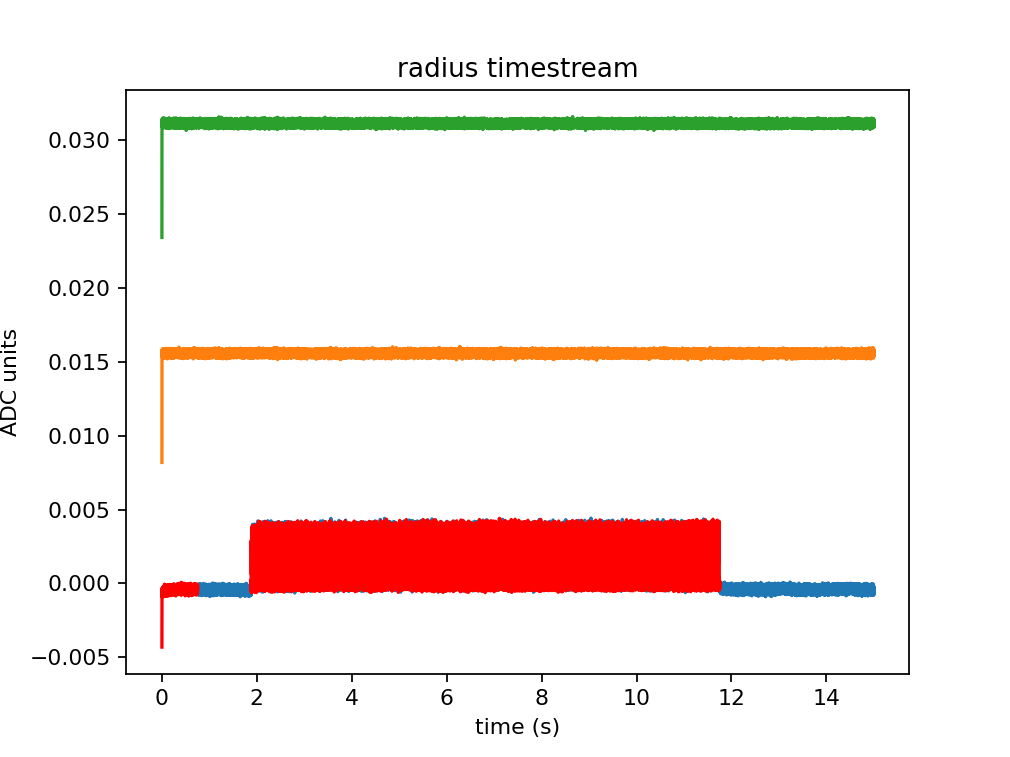

<IPython.core.display.Javascript object>


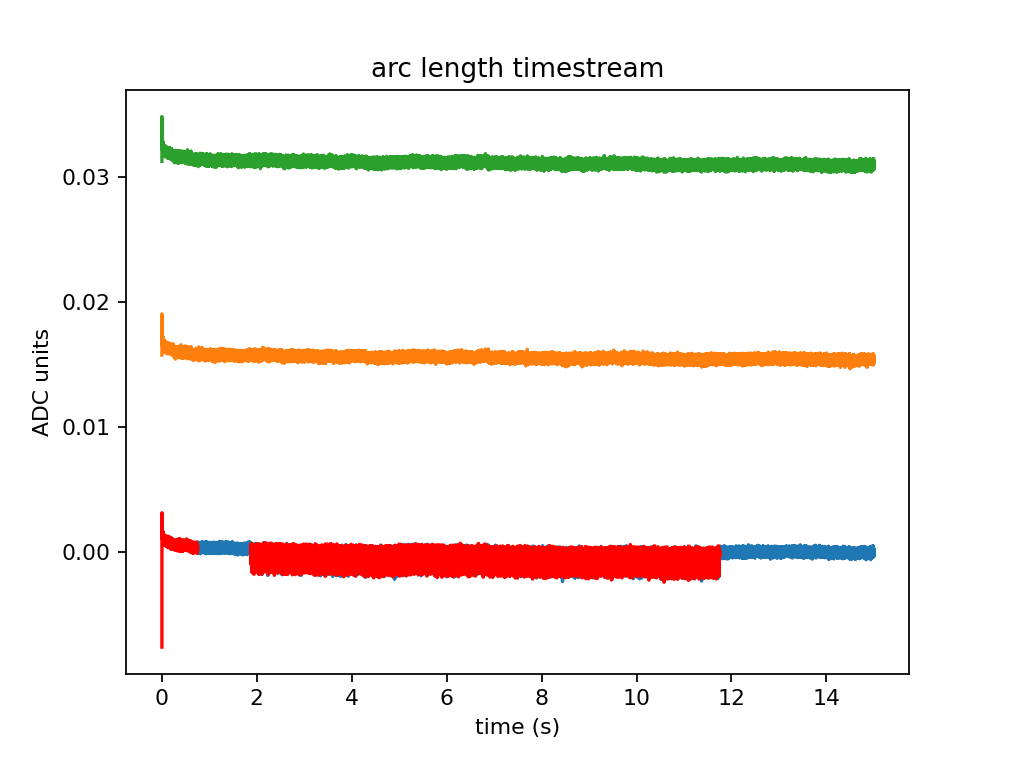

<IPython.core.display.Javascript object>


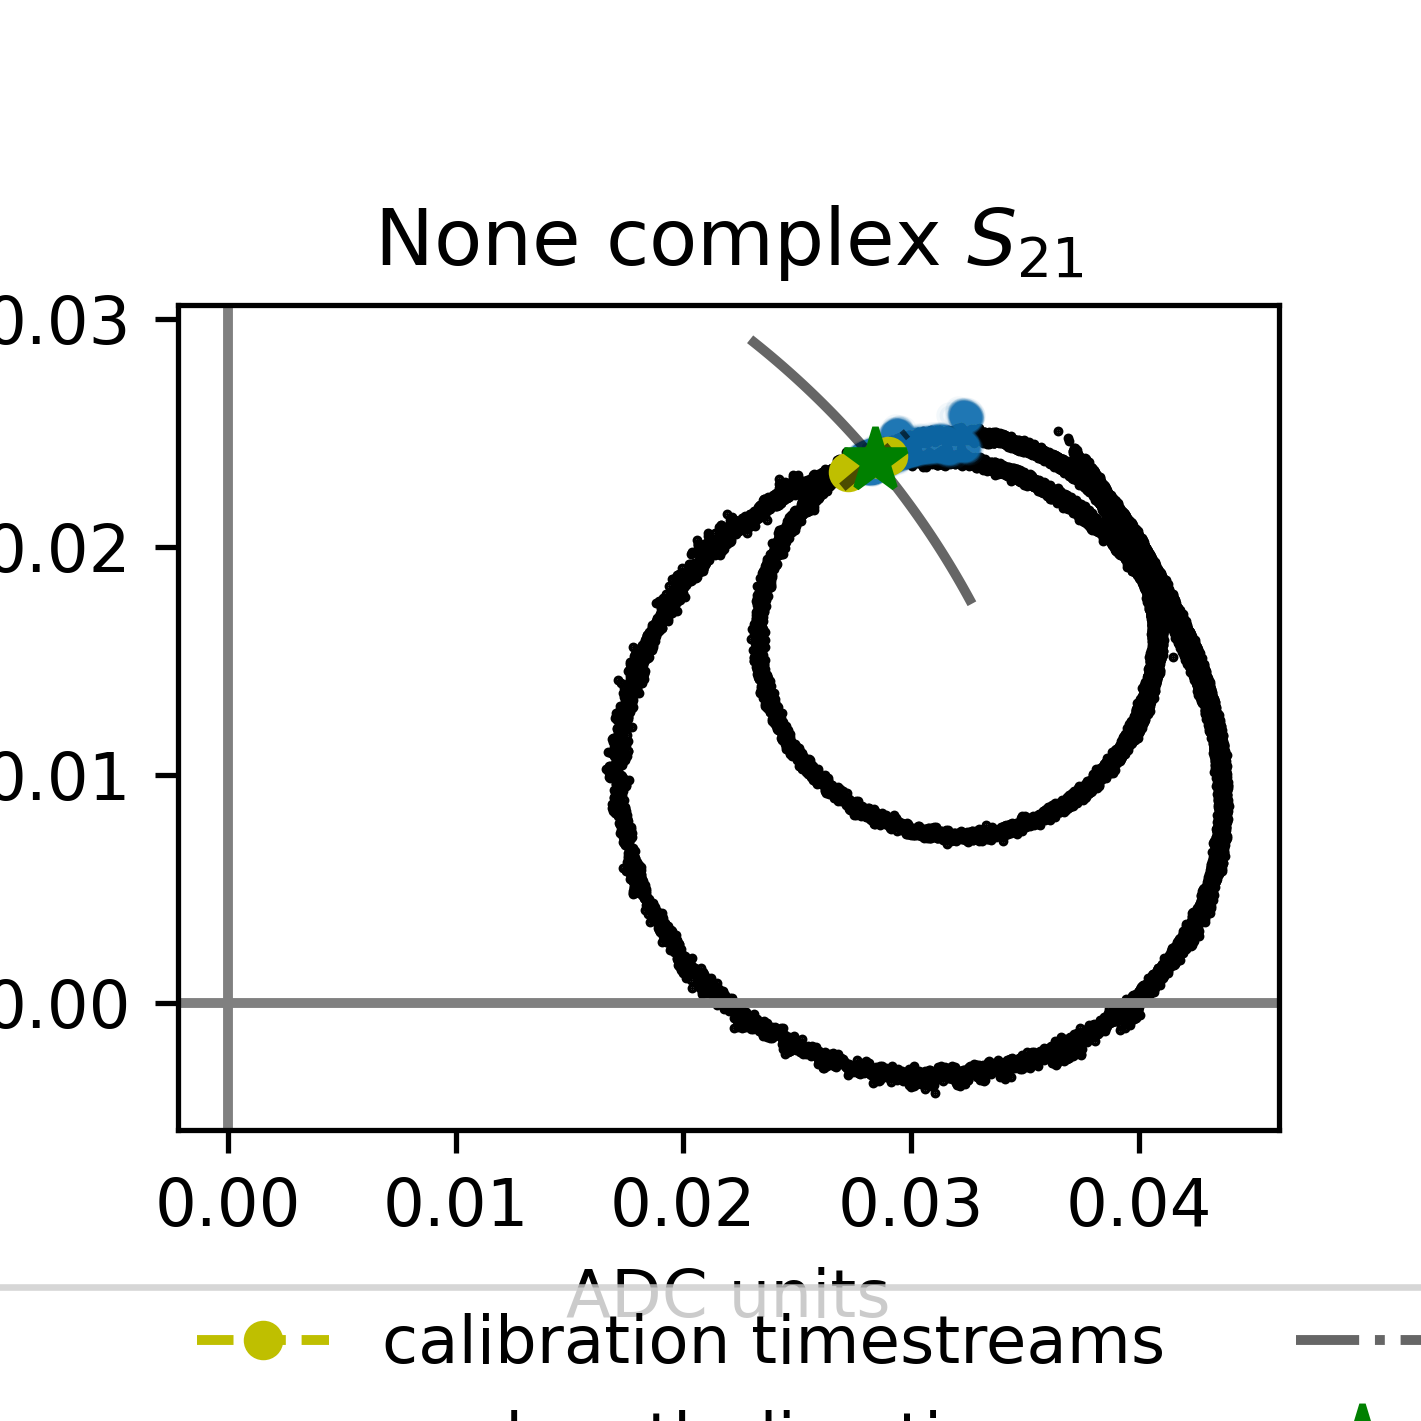

<IPython.core.display.Javascript object>


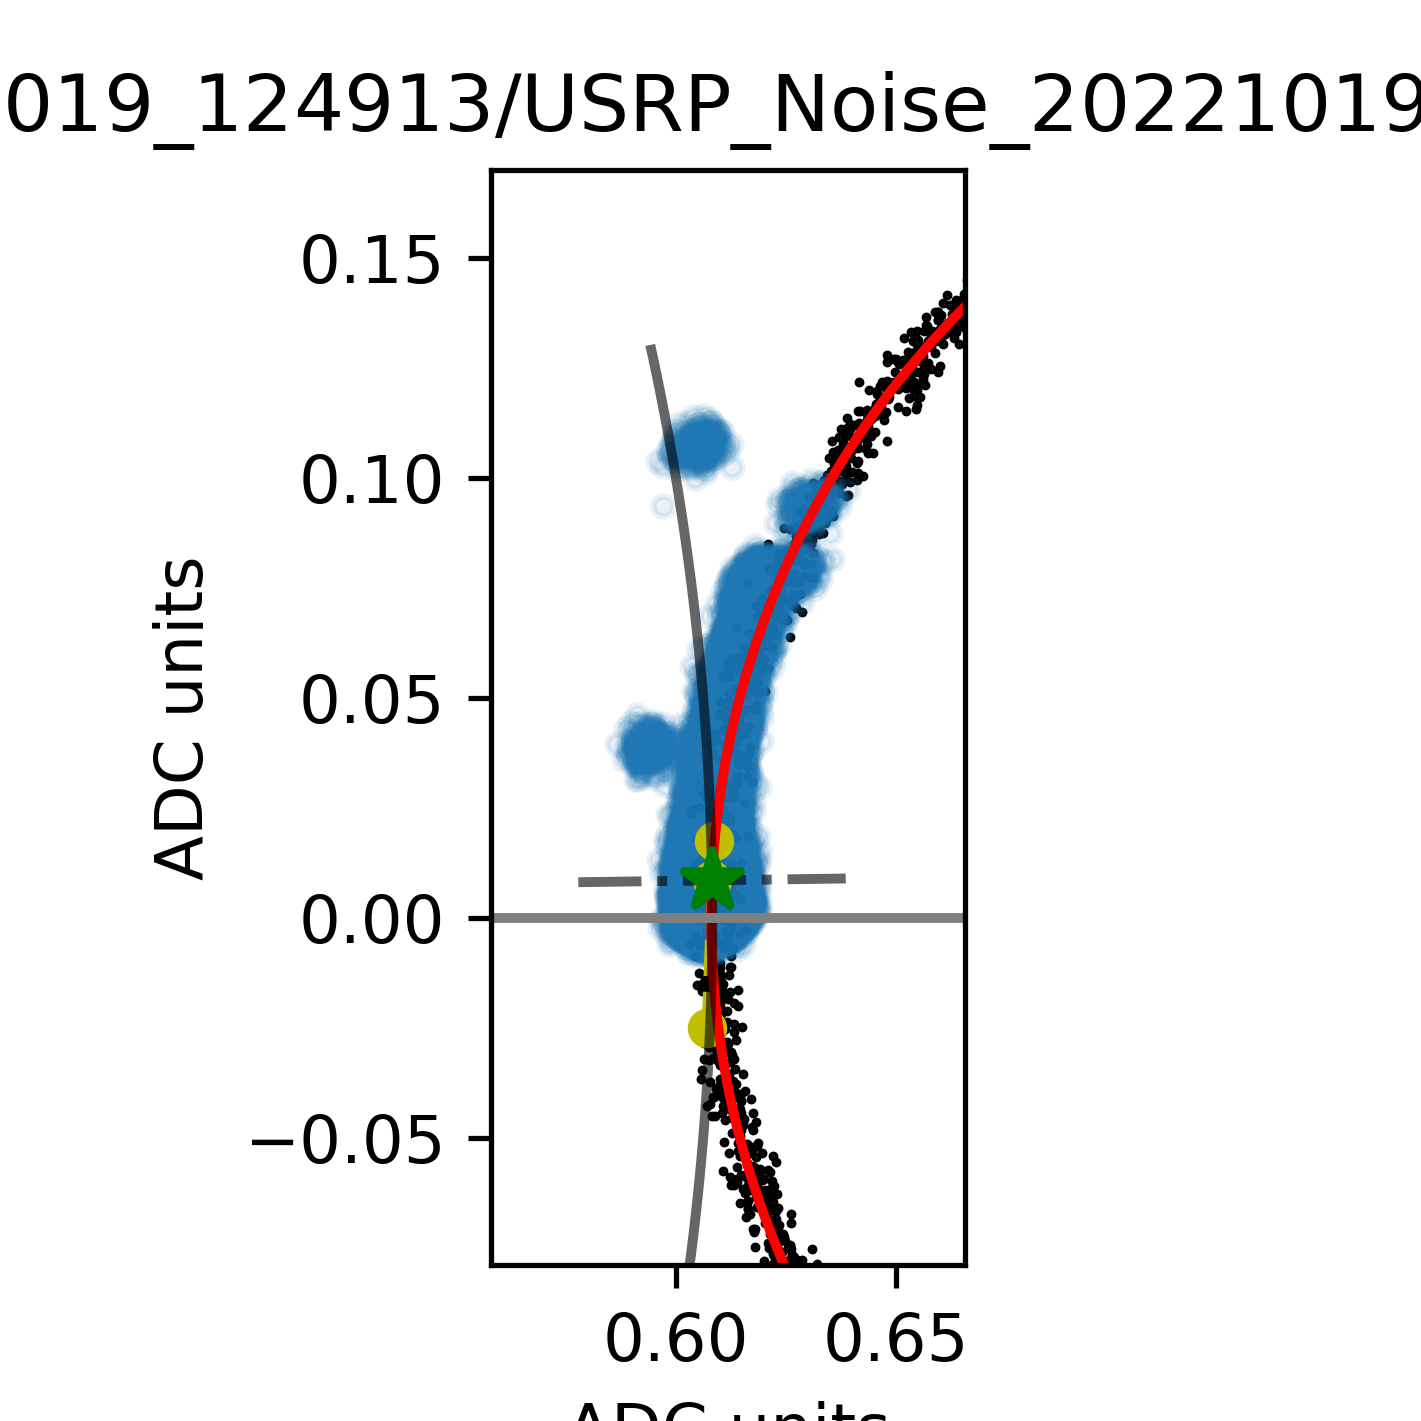

<IPython.core.display.Javascript object>


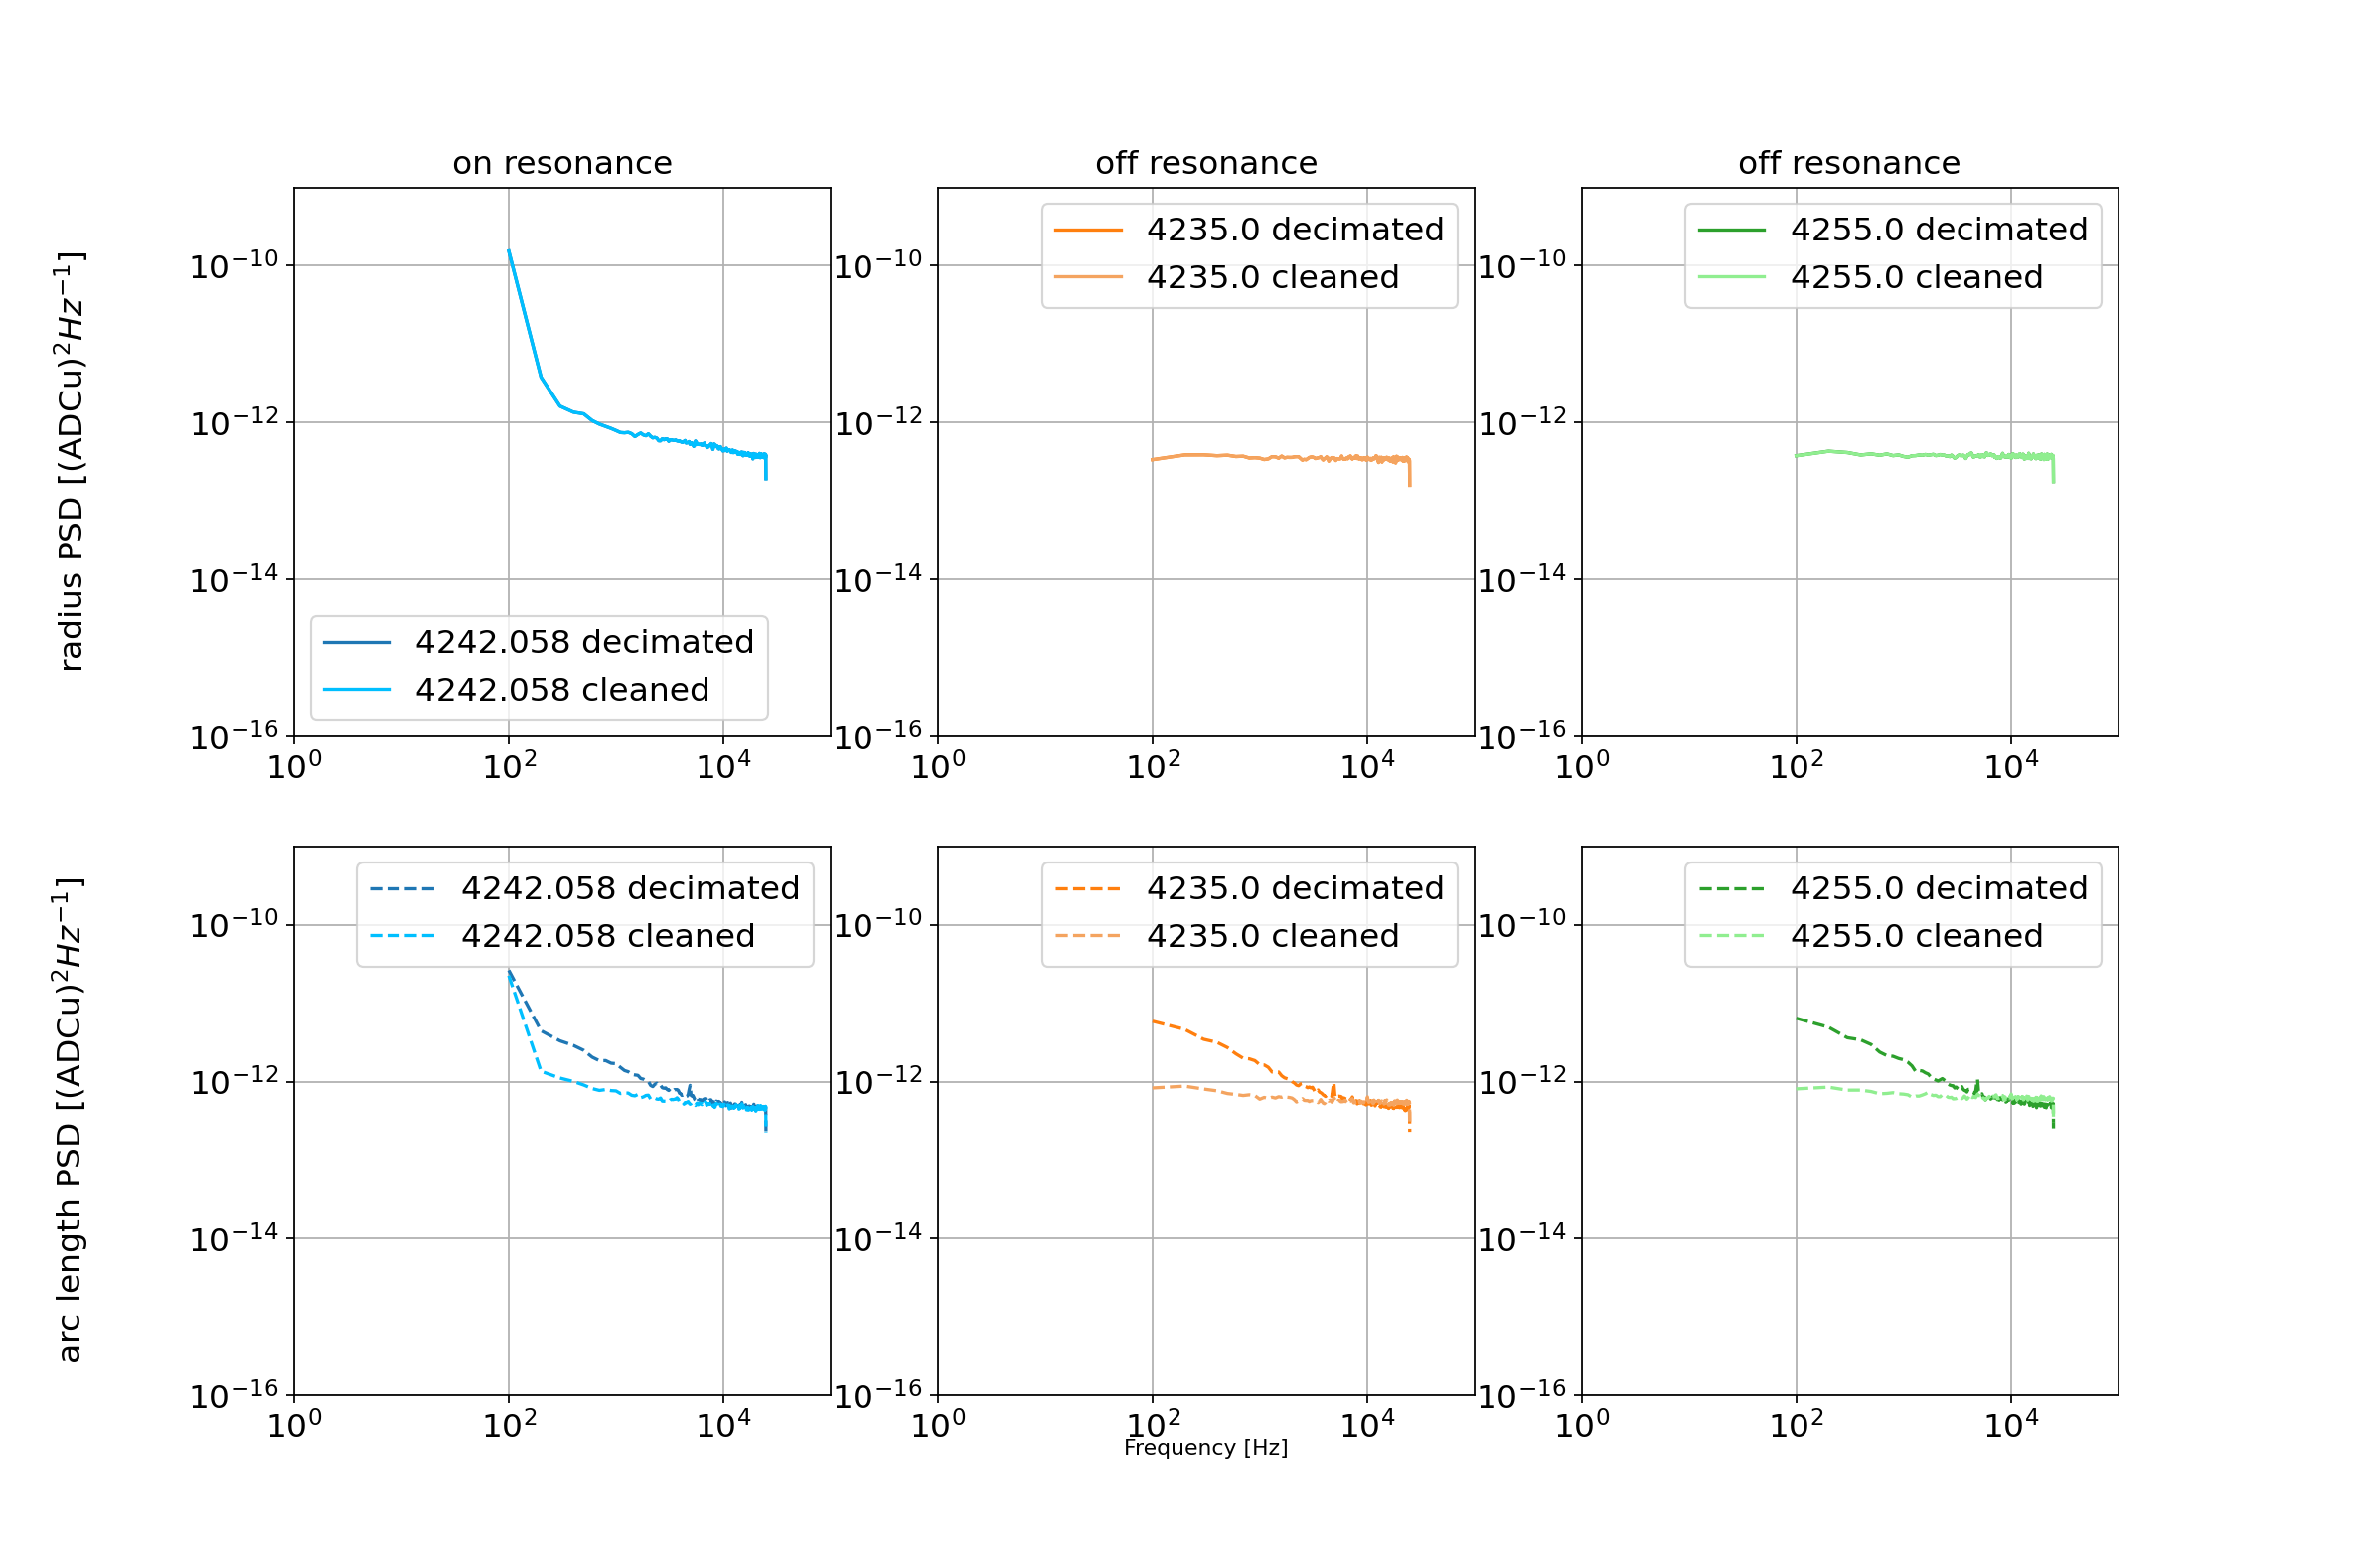

<IPython.core.display.Javascript object>


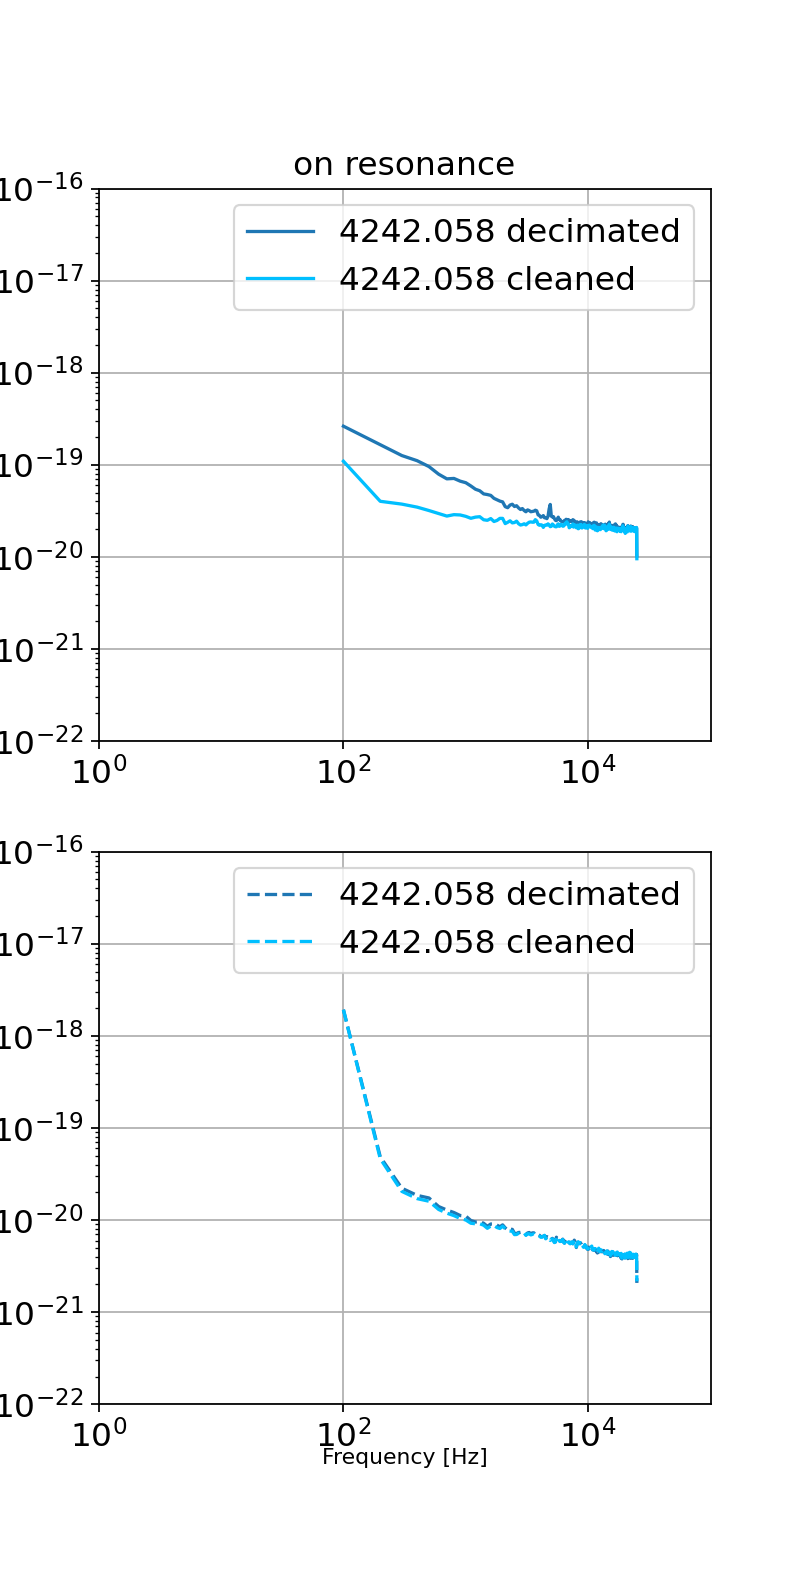

In [45]:
powers_, PSDs_, res_, timestreams_ = Thf.CleanPSDs(None,None,series=series, f_transient=0.05)

In [46]:
pulse_start_sec  = run_df["pls_sec_s"].iloc[idx] # 5.0 #
N_pulses_to_find = run_df["N_pls_fnd"].iloc[idx] # None#
pulse_rate_Hz    = run_df["p_rate_Hz"].iloc[idx] # 100 #
pulse_end_sec    = run_df["pls_sec_f"].iloc[idx] # 60 #

In [35]:
extra_dec = 100

In [36]:
## Get the timestream and decimate it
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

data_noise, data_info = PUf.unavg_noi(tone_files[0])
time = data_info['time']
time_correction = data_info['sampling period']

data_noise = Prf.average_decimate(data_noise, decimation=extra_dec)
## data_noise is complex values of S21
## can take Re() and Im() to get I, Q
## can take abs() and angle() to get magnitude and phase
time_correction *= extra_dec
time = time[::extra_dec]

In [37]:
res = Ptt.readDataFile(series)

Line Delay file:  /data/USRP_Noise_Scans/20221019/20221019_130611/USRP_Delay_20221019_130611.h5
VNA scan file:    /data/USRP_Noise_Scans/20221019/20221019_130611/USRP_VNA_20221019_130611.h5
Timestream files: ['/data/USRP_Noise_Scans/20221019/20221019_130611/USRP_Noise_20221019_130611_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20221019/20221019_130611/noise_averages_20221019_130611.h5


<IPython.core.display.Javascript object>


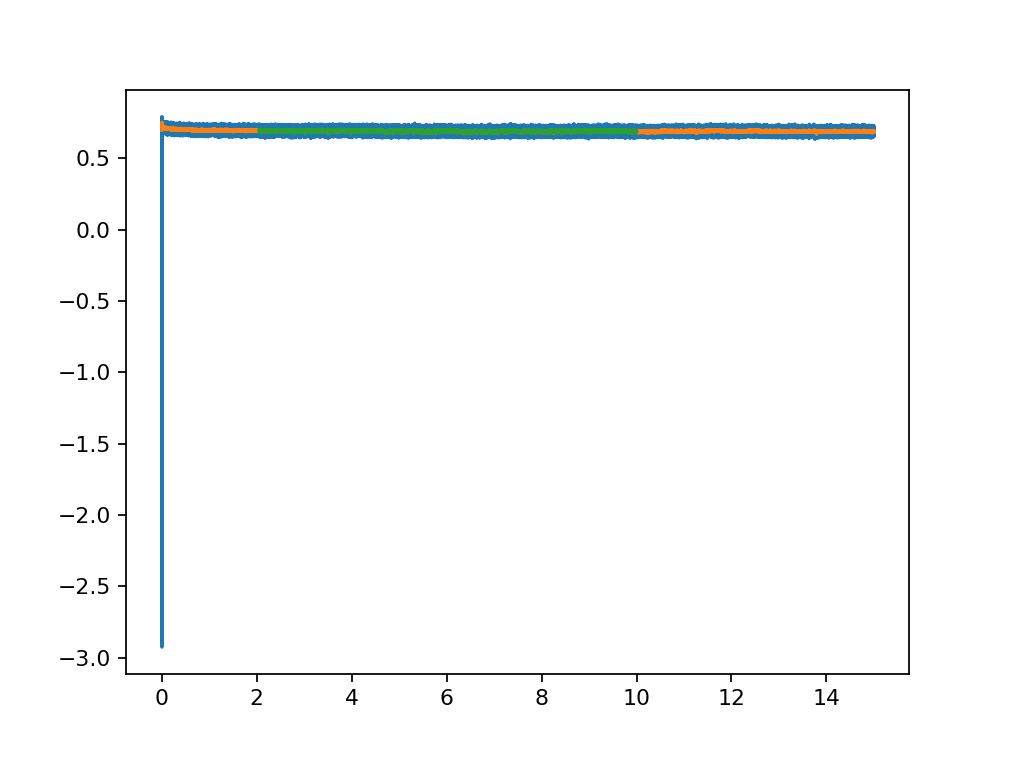

In [38]:
fig = plt.figure()
ax0 = fig.gca()

ax0.plot(res["Time"],res["Phase"])

xavg, yavg = Ptt.movavg_xy(res["Time"],res["Phase"],side_pts=extra_dec)
ax0.plot(xavg, yavg)


ax0.plot(time[(time>pulse_start_sec)*(time<pulse_end_sec)],
         np.angle(data_noise[(time>pulse_start_sec)*(time<pulse_end_sec),0]))

<IPython.core.display.Javascript object>


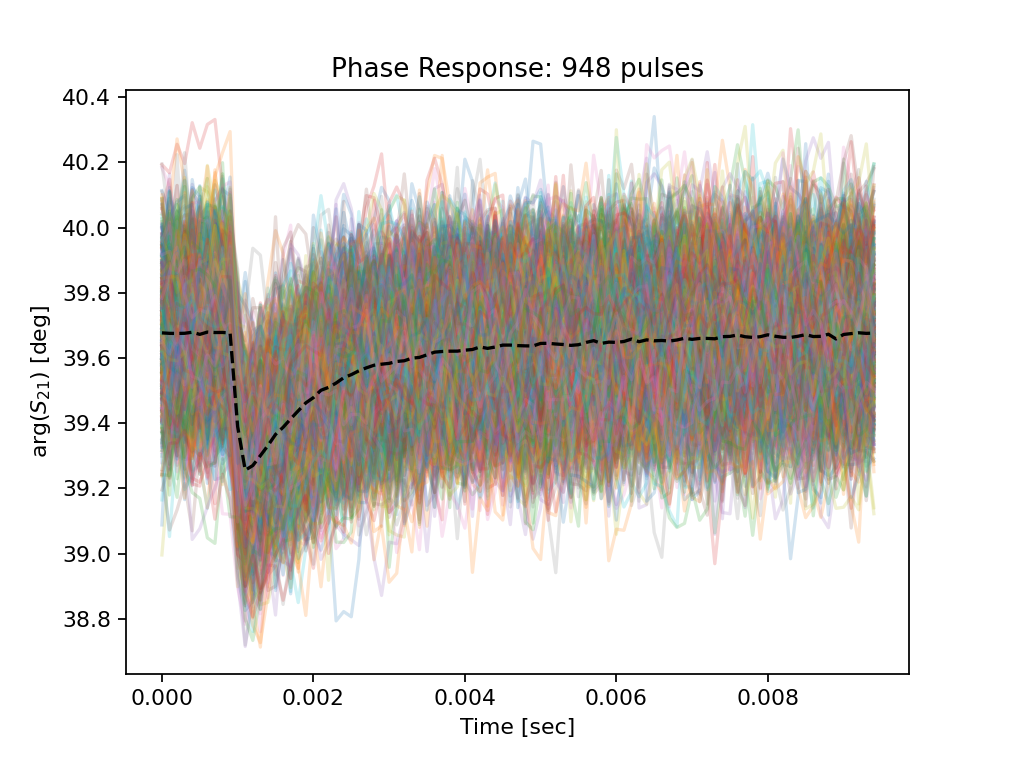

Text(0, 0.5, '$\\mathrm{arg}(S_{21})$ [deg]')

In [39]:
plot_vs_time = True
avg, npulses, bl, win = Ptt.StackPulses(np.angle(data_noise[:,0])*180/np.pi, pulse_start_sec,
                                        win_fac=0.95, Npulses=N_pulses_to_find, sample_rate=1e6/extra_dec,
                                        bl_subtract=False, show_plots=True, plot_time=plot_vs_time)
plt.gca().set_title("Phase Response: "+str(npulses)+" pulses")
plt.gca().set_xlabel(r"Decimated sample index")
if plot_vs_time:
    plt.gca().set_xlabel(r"Time [sec]")
plt.gca().set_ylabel(r"$\mathrm{arg}(S_{21})$ [deg]")

<IPython.core.display.Javascript object>


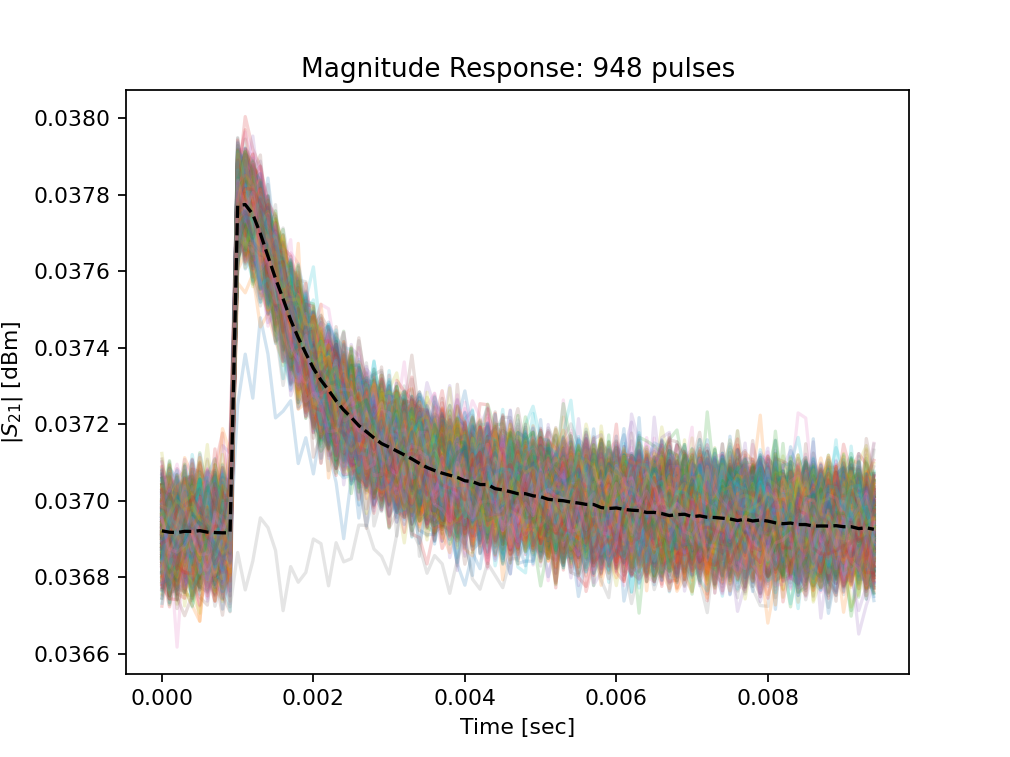

Text(0, 0.5, '$|S_{21}|$ [dBm]')

In [40]:
plot_vs_time = True
avg, npulses, bl, win = Ptt.StackPulses(np.abs(data_noise[:,0]), pulse_start_sec,
                                        win_fac=0.95, Npulses=N_pulses_to_find, sample_rate=1e6/extra_dec,
                                        bl_subtract=False, show_plots=True, plot_time=plot_vs_time)
plt.gca().set_title("Magnitude Response: "+str(npulses)+" pulses")
plt.gca().set_xlabel(r"Decimated sample index")
if plot_vs_time:
    plt.gca().set_xlabel(r"Time [sec]")
plt.gca().set_ylabel(r"$|S_{21}|$ [dBm]")

In [ ]:
pidx = int(npulses*np.random.rand())
Ptt.PlotPulse(data_noise[:,0], pulse_start_sec, p_index=pidx, fig_obj=None,
              pulse_rate_Hz=pulse_rate_Hz, win_fac=0.75, sample_rate=1e6/extra_dec,
              baseline=None, complx=True)
ax0 = plt.gca()
ax0.set_title("Pulse #"+str(pidx))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')

In [ ]:
VNA_f, VNA_z = PUf.read_vna(vna_file)

In [ ]:
fig = plt.figure()
ax0 = plt.gca()
for i in np.arange(npulses):
    Ptt.PlotPulse(data_noise[:,0], pulse_start_sec, p_index=i, fig_obj=fig,
                  pulse_rate_Hz=pulse_rate_Hz, win_fac=0.75, sample_rate=1e6/extra_dec,
                  baseline=None, complx=True)
ax0.set_title("Total Pulses: "+str(npulses))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')

In [ ]:
fig = plt.figure()
ax0 = plt.gca()
for i in np.arange(npulses):
    Ptt.PlotPulse(data_noise[:,0], pulse_start_sec, p_index=i, fig_obj=fig,
                  pulse_rate_Hz=pulse_rate_Hz, win_fac=0.75, sample_rate=1e6/extra_dec,
                  baseline=None, complx=True)
ax0.set_title("Total Pulses: "+str(npulses))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')


xlims = ax0.get_xlim()
ylims = ax0.get_ylim()
ax0.plot(np.real(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         np.imag(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         "k-",marker='o')
ax0.set_xlim(xlims)
ax0.set_ylim(ylims)

In [ ]:
fig = plt.figure()
ax0 = plt.gca()
for i in np.arange(npulses):
    Ptt.PlotPulse(data_noise[:,0], pulse_start_sec, p_index=i, fig_obj=fig,
                  pulse_rate_Hz=pulse_rate_Hz, win_fac=0.75, sample_rate=1e6/extra_dec,
                  baseline=None, complx=True)
ax0.set_title("Total Pulses: "+str(npulses))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')

ax0.plot(np.real(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         np.imag(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         "k-",marker='o')

In [ ]:
## Size of signal
z_roi = VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]
i_min = np.argmin(np.real(z_roi))
i_max = np.argmax(np.real(z_roi))
rad   = np.abs(z_roi[i_max]-z_roi[i_min])
print(rad)

In [ ]:
## Size of noise
noise = 0.0003247
snr   = rad/noise
print("SNR ~",snr)

In [ ]:
dec_fac = 100

## Create a figure to house the average phase responses
fig = plt.figure()
ax0 = fig.gca()

ax0.set_title("Phase Response")
ax0.set_xlabel("Time [ms]")
ax0.set_ylabel(r"$\mathrm{arg}(S_{21})$ [rad]")

## Now loop over the first three files and extract the average phase response 
for j in [0,1,2]:
    series = run_df["series"].iloc[j]
    Vled   = run_df["Vled"].iloc[j]
    
    ## Get the timestream and decimate it
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

    data_noise, data_info = PUf.unavg_noi(tone_files[0])
    data_noise = Prf.average_decimate(data_noise, decimation=dec_fac)

    avg, npulses, bl, win = Ptt.StackPulses(np.angle(data_noise[:,0]), run_df["pls_sec_s"].iloc[j],
                                        win_fac=0.75, Npulses=run_df["N_pls_fnd"].iloc[j], sample_rate=1e6/extra_dec,
                                        bl_subtract=True, show_plots=False, plot_time=True)
    
    time_range = np.arange(len(avg))/(1e6/extra_dec)
    time_range = time_range - time_range[np.argmax(avg[1:]-avg[:-1])]
    
    ax0.plot(time_range*1e3,avg,linestyle="--",marker="o",label=series+" - Vled = "+str(Vled)+"V")
    
ax0.legend(loc='best')

In [ ]:
dec_fac = 100

## Create a figure to house the average phase responses
fig = plt.figure()
ax0 = fig.gca()

ax0.set_title("Magnitude Response")
ax0.set_xlabel("Time [ms]")
ax0.set_ylabel(r"$|S_{21}|$ [dBm]")

## Now loop over the first three files and extract the average phase response 
for j in [0,1,2]:
    series = run_df["series"].iloc[j]
    Vled   = run_df["Vled"].iloc[j]
    
    ## Get the timestream and decimate it
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

    data_noise, data_info = PUf.unavg_noi(tone_files[0])
    data_noise = Prf.average_decimate(data_noise, decimation=dec_fac)

    avg, npulses, bl, win = Ptt.StackPulses(np.abs(data_noise[:,0]), run_df["pls_sec_s"].iloc[j],
                                        win_fac=0.75, Npulses=run_df["N_pls_fnd"].iloc[j], sample_rate=1e6/extra_dec,
                                        bl_subtract=True, show_plots=False, plot_time=True)
    
    time_range = np.arange(len(avg))/(1e6/extra_dec)
    time_range = time_range - time_range[np.argmax(avg[1:]-avg[:-1])]
    
    ax0.plot(time_range*1e3,avg,linestyle="--",marker="o",label=series+" - Vled = "+str(Vled)+"V")
    
ax0.legend(loc='best')